# Bank Fraud Detection

In [57]:
## importing laibaries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [58]:
## Loading the data set
Fraud_1=pd.read_csv('Fraud_check.csv')

In [59]:
Fraud_1.shape

(600, 6)

In [60]:
## checking the data 
Fraud_1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## EDA

# using labele encoding to convert it into numerical form

In [61]:
## Checking for the Undergrad
Fraud_1['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [62]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Fraud_1['Undergrad']= label_encoder.fit_transform(Fraud_1['Undergrad']) 

In [63]:
Fraud_1.head(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,Single,68833,50047,10,YES
1,1,Divorced,33700,134075,18,YES
2,0,Married,36925,160205,30,YES
3,1,Single,50190,193264,15,YES
4,0,Married,81002,27533,28,NO


In [64]:
## checking for the Marital.Status
Fraud_1['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [65]:
Fraud_1['Marital.Status']= label_encoder.fit_transform(Fraud_1['Marital.Status'])

In [66]:
Fraud_1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,YES
1,1,0,33700,134075,18,YES
2,0,1,36925,160205,30,YES
3,1,2,50190,193264,15,YES
4,0,1,81002,27533,28,NO


In [67]:
## Checking for the urbun
Fraud_1['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [68]:
Fraud_1['Urban']= label_encoder.fit_transform(Fraud_1['Urban'])

In [69]:
Fraud_1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


# Graphical Reprentation

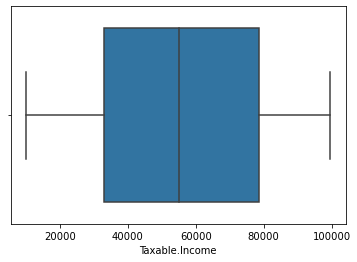

In [70]:
sns.boxplot(Fraud_1['Taxable.Income'])
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

<AxesSubplot:xlabel='City.Population'>

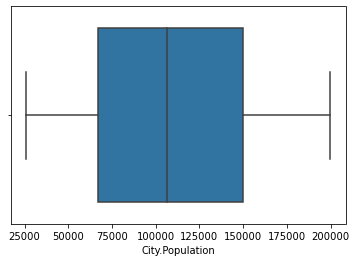

In [71]:
sns.boxplot(Fraud_1['City.Population'])

<AxesSubplot:xlabel='Work.Experience'>

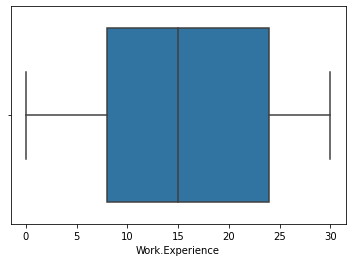

In [72]:
sns.boxplot(Fraud_1['Work.Experience'])

In [73]:
x=Fraud_1.drop(['Taxable.Income'],axis=1)
y=Fraud_1['Taxable.Income']

In [74]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [75]:
y

0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable.Income, Length: 600, dtype: int64

In [76]:
## Splitting the data into train test split
from sklearn.model_selection import train_test_split

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [82]:
from sklearn.tree import  DecisionTreeClassifier

In [83]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [84]:
y_pred=model.predict(x_test)
print(y_pred)

[20391 12083 20309 10933 10329 35868 41382 24541 10900 15673 10870 10870
 10455 12083 17783 20309 25062 10379 17440 10329 10870 15627 10329 20719
 10870 12072 12810 19184 19184 23855 10900 35868 12083 17440 23855 10348
 25062 35868 12072 10329 10870 10933 12470 17183 19184 17183 15673 10455
 17183 10933 20719 11784 35868 15627 14912 12083 12072 17783 10933 10455
 11784 10329 14912 35868 14912 12810 10150 12072 19169 15627 10329 23855
 10163 10163 12083 10870 17183 14912 17783 17783 19169 35868 41382 10900
 17440 10329 10150 11784 12470 10455 20391 12083 35868 17440 25062 12810
 41382 17183 20719 10163 15627 25062 10933 25062 20309 10455 19184 12083
 23855 17783 20391 10150 10455 10150 35868 12072 10329 10455 11784 15673
 14912 12470 20391 17183 10933 10933 19184 15673 10329 12083 17783 20309
 41382 15673 24541 10150 10379 23855 17183 14912 20309 20391 19184 13571
 10329 10870 10870 12083 10933 13571]


In [85]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

0.0


In [86]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=5)

In [87]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [88]:
y1_pred=model_gini.predict(x_test)
print(y1_pred)

[10163 10870 10329 10870 10329 10163 10329 17783 18192 10163 18192 10870
 10163 18192 17783 10329 59689 10163 10329 10329 10870 10329 10329 10870
 18192 10329 10870 17783 17783 10329 10870 10163 10870 10329 10329 10163
 16690 10163 10163 10163 18192 10870 10163 17183 17783 17183 10163 10329
 16690 10870 10870 10870 44809 10329 17183 10870 10163 17783 10870 10163
 10870 10329 17183 10163 16690 10870 59689 10329 10163 10329 10329 10329
 10163 10329 10870 18192 17183 16690 17783 17783 10163 39144 10329 18192
 10163 10163 16690 99128 10163 10329 32356 10870 10163 10163 17183 18192
 10329 16690 10870 10163 10329 59689 18192 16690 10329 10329 17783 18192
 10329 17783 10163 17183 10329 16690 10163 10163 10329 10163 10870 10329
 16690 10163 10163 16690 10870 18192 17783 10163 10163 10870 17783 10329
 10163 10163 17783 16690 83814 17440 51363 17183 10329 10163 17783 98240
 10329 10870 10870 18192 18192 10870]


In [89]:
score2 = accuracy_score(y_test, y1_pred)
print(score2)

0.0


In [90]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regression 

In [91]:
model2 = DecisionTreeRegressor()
model2.fit(x_train, y_train)

DecisionTreeRegressor()

In [92]:
y3_pred=model.predict(x_test)
print(y3_pred)

[20391 12083 20309 10933 10329 35868 41382 24541 10900 15673 10870 10870
 10455 12083 17783 20309 25062 10379 17440 10329 10870 15627 10329 20719
 10870 12072 12810 19184 19184 23855 10900 35868 12083 17440 23855 10348
 25062 35868 12072 10329 10870 10933 12470 17183 19184 17183 15673 10455
 17183 10933 20719 11784 35868 15627 14912 12083 12072 17783 10933 10455
 11784 10329 14912 35868 14912 12810 10150 12072 19169 15627 10329 23855
 10163 10163 12083 10870 17183 14912 17783 17783 19169 35868 41382 10900
 17440 10329 10150 11784 12470 10455 20391 12083 35868 17440 25062 12810
 41382 17183 20719 10163 15627 25062 10933 25062 20309 10455 19184 12083
 23855 17783 20391 10150 10455 10150 35868 12072 10329 10455 11784 15673
 14912 12470 20391 17183 10933 10933 19184 15673 10329 12083 17783 20309
 41382 15673 24541 10150 10379 23855 17183 14912 20309 20391 19184 13571
 10329 10870 10870 12083 10933 13571]


In [93]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y3_pred)
print(r2)

-2.0204804541263326


# Conclusion

## Solving this problem by using classification & also regression but not getting correct accuracy please help to solve this problem

## Checking with another target value i.e Urban

In [94]:
## spliting data into target & fetures
X=Fraud_1.drop(['Urban'],axis=1)
Y=Fraud_1['Urban']

In [95]:
X

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience
0,0,2,68833,50047,10
1,1,0,33700,134075,18
2,0,1,36925,160205,30
3,1,2,50190,193264,15
4,0,1,81002,27533,28
...,...,...,...,...,...
595,1,0,76340,39492,7
596,1,0,69967,55369,2
597,0,0,47334,154058,0
598,1,1,98592,180083,17


In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [97]:
## fitting model using descion tree classifier
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model2.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [98]:
## Checking for the test data
y2_pred=model2.predict(X_test)
print(y2_pred)

[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0]


In [99]:
## checking accuracy
score3 = accuracy_score(Y_test, y2_pred)
print(score3)

0.58


In [100]:
## Using ginny criteria
model3 = DecisionTreeClassifier(criterion = 'gini',max_depth=3)
model3.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [101]:
y3_pred=model3.predict(X_test)
print(y3_pred)

[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0]


In [102]:
## Checking accuracy
score4 = accuracy_score(Y_test, y3_pred)
print(score4)

0.5733333333333334


# When taking Urban as the target then getting 0.58 accuracy